In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

In [2]:
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head(1)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,ID,AGE,AMI_FLAG,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,CON_VISIT_04_Q01,CON_VISIT_04_Q02,CON_VISIT_04_Q03,CON_VISIT_04_Q04,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
count,100000.000000,100000.000000,100000.000000,99970.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000
mean,50000.500000,72.770440,0.027260,0.289367,1.138959,1.028531,0.44411,0.446700,0.448490,0.446560,...,0.520610,0.160920,0.027480,0.012910,0.131820,0.389160,0.369960,0.46998,0.16429,0.464400
std,28867.657797,9.715514,0.162841,0.455188,0.946879,0.758254,1.34770,1.315118,1.392324,1.379421,...,0.499578,0.367459,0.163478,0.112887,0.338297,0.487562,0.482796,0.49910,0.37054,0.498734
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,25000.750000,68.000000,0.000000,0.000000,0.522000,0.570000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,50000.500000,73.000000,0.000000,0.000000,0.862000,0.891000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,75000.250000,79.000000,0.000000,1.000000,1.414000,1.306000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.00000,1.000000
max,100000.000000,95.000000,1.000000,3.000000,15.120000,15.704000,88.00000,70.000000,52.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000


In [7]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [8]:
#List of columns that have only one value
singlevaluedcol=[]
for i in df.columns:
    if df[i].nunique==1:
        singlevaluedcol.append(i)
        

In [9]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

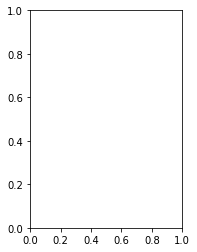

In [10]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)

Text(0.5,1,'Number of Members males or females in the dataset')

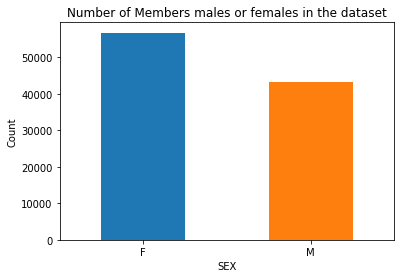

In [11]:
#Plot for Male and female count for humana members
df.groupby('SEX_CD').count()['ID'].plot.bar()
plt.xlabel("SEX")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Number of Members males or females in the dataset")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

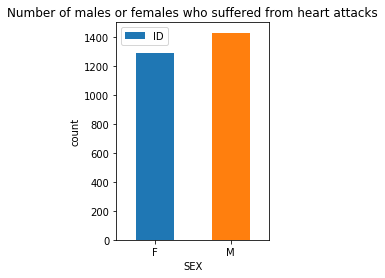

In [12]:
plt.subplot(1,2,2)
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot.bar(legend=True)
plt.xlabel("SEX")
plt.ylabel("count")
plt.title("Number of males or females who suffered from heart attacks")
plt.xticks(rotation=0)
plt.show()

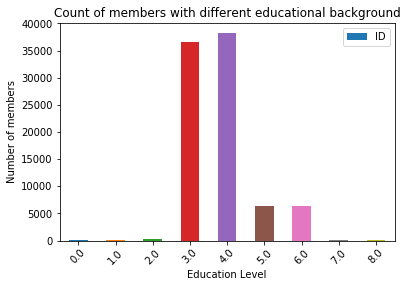

In [13]:
df.groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Education Level")
plt.ylabel("Number of members")
plt.title("Count of members with different educational background")
plt.xticks(rotation=45)
plt.show()

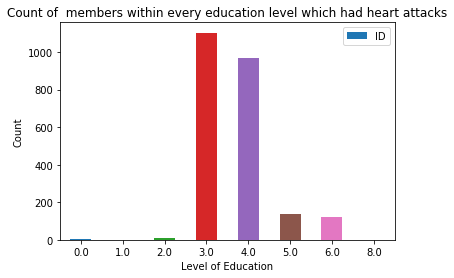

In [14]:
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Level of Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of  members within every education level which had heart attacks")
plt.show()

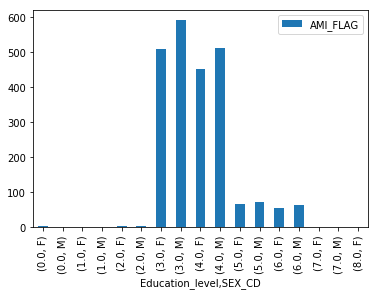

In [15]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



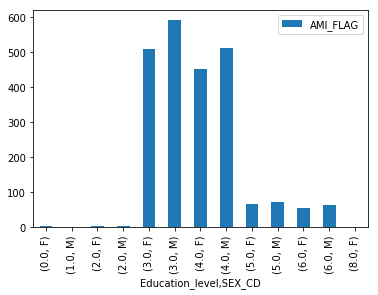

In [16]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


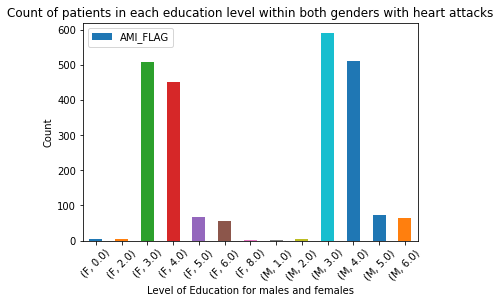

In [17]:
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot.bar(stacked=True,legend=True)
plt.xlabel("Level of Education for males and females")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of patients in each education level within both genders with heart attacks")
plt.show()

In [18]:
l=list(d.keys())

In [19]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [20]:
df.shape

(100000, 448)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [22]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

In [24]:
df.groupby('RX_THER_01_YR2016').count()['ID']

RX_THER_01_YR2016
0     81575
1     12727
2      3770
3      1150
4       410
5       185
6        79
7        35
8        25
9        15
10        9
11        6
12        4
13        4
14        1
15        1
16        2
20        1
22        1
Name: ID, dtype: int64

In [25]:
df.groupby('ORIG_REAS_ENTITLE_CD').count()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
ORIG_REAS_ENTITLE_CD,,,,,,,,,,,,,,,,,,,,,
0.0,71114,71114,71114,71114,71112,71112,71114,71114,71031,71114,...,71114,71114,71114,71114,71114,71114,71114,71114,71114,71114
1.0,28790,28790,28790,28790,28790,28790,28790,28790,28747,28790,...,28790,28790,28790,28790,28790,28790,28790,28790,28790,28790
2.0,60,60,60,60,60,60,60,60,59,60,...,60,60,60,60,60,60,60,60,60,60
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0.5,1,'Age dependency on heart attacks')

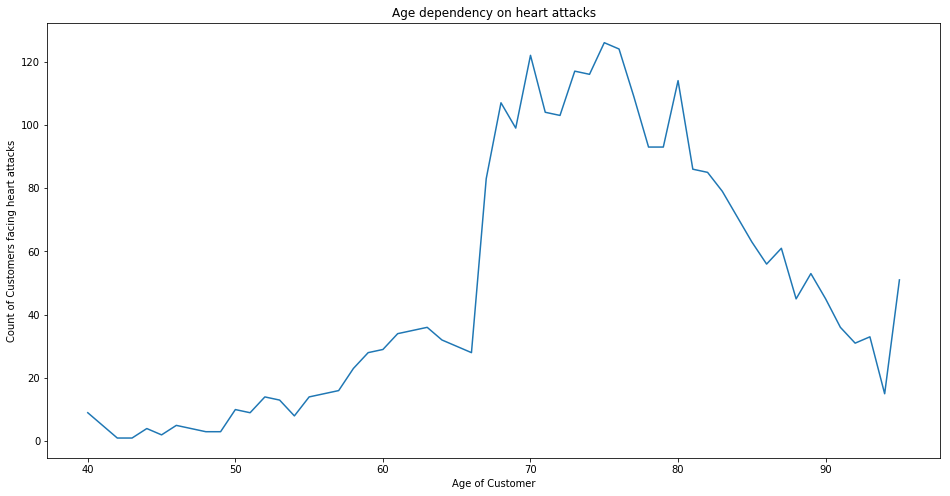

In [26]:
#Age Vs Heart attacks relationships
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(16,8))
plt.xlabel("Age of Customer")
plt.ylabel("Count of Customers facing heart attacks")
plt.title("Age dependency on heart attacks")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

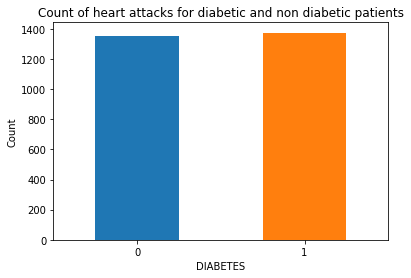

In [27]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

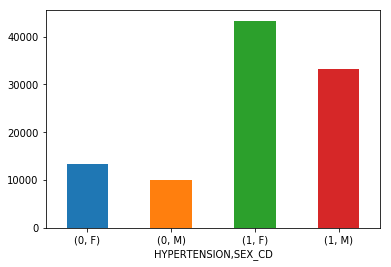

In [28]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

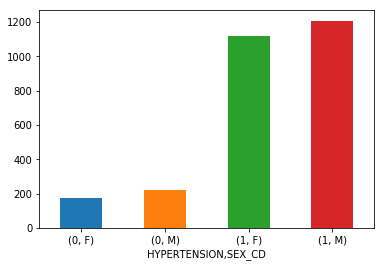

In [29]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

In [30]:
t=df.groupby(['Education_level','SEX_CD']).count()['ID']

Text(0.5,1,'Count by Education Level and gender')

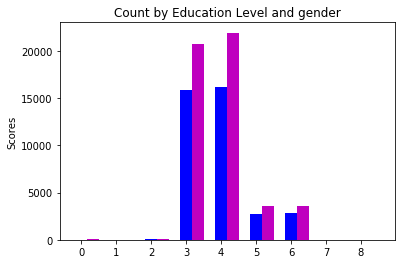

In [31]:
N=len(df.groupby('Education_level'))
men=[]
women=[]
for j in range(0,N):
    women.append(t.loc[j][0])
    try:
        men.append(t.loc[j][1])
        
    except:
        men.append(0)
men_means = tuple(men)
women_means = tuple(women)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1=ax.bar(ind,men_means,color='b',width=width)
rects2=ax.bar(ind+width,women_means,color='m',width=width)
#rects1 = ax.bar(ind, men_means, width, color='r')
plt.xticks(ind)
ax.set_ylabel('Scores')
ax.set_title('Count by Education Level and gender')

In [32]:
df.columns[0:50]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04', 'CON_VISIT_05_Q02',
       'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02', 'CON_VISIT_10_Q02',
       'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04', 'CON_VISIT_23_Q02',
       'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01', 'CON_VISIT_30_Q02',
       'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02', 'CON_VISIT_33_Q04',
       'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02', 'CON_VISIT_06_Q03',
       'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03', 'CON_VISIT_33_Q02',
       'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03', 'CON_VISIT_10_Q04',
       'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01', 'CON_

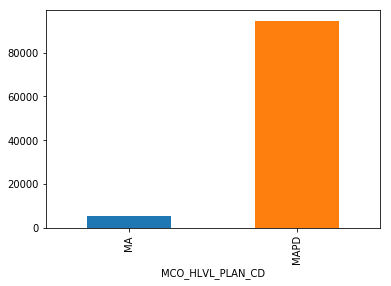

In [33]:
df.groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

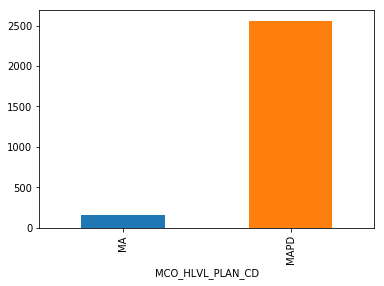

In [34]:
df[df['AMI_FLAG']==1].groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

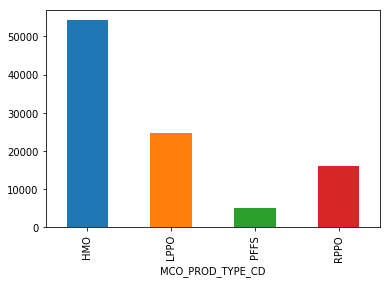

In [35]:
df.groupby('MCO_PROD_TYPE_CD').count()['ID'].plot.bar()

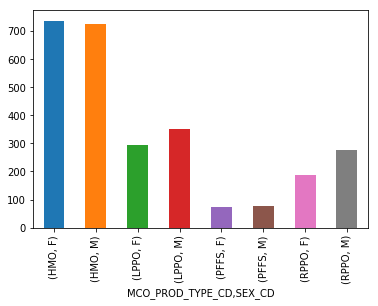

In [36]:
df[df['AMI_FLAG']==1].groupby(['MCO_PROD_TYPE_CD','SEX_CD']).count()['ID'].plot.bar()

In [37]:
#df[df['AMI_FLAG']==1].count() #2726

In [38]:
df.loc[:, df.isna().any()]

,SEX_CD,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,PCP_ASSIGNMENT,DUAL,INSTITUTIONAL,LIS,MCO_HLVL_PLAN_CD,MCO_PROD_TYPE_CD,...,Pct_above_poverty_line,Pct_below_poverty_line,Decile_struggle_Med_lang,Home_value,Est_Net_worth,Est_income,Index_Health_ins_engage,Index_Health_ins_influence,Population_density_centile_ST,Population_density_centile_US
0,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,LPPO,...,94.0,6.0,5.0,127.0,87500.0,87500.0,3.0,2.0,70.0,84.0
1,F,N,N,1.0,ATTRIBUTED,N,N,N,MAPD,PFFS,...,86.0,14.0,NaN,128.0,-2500.0,7500.0,1.0,4.0,83.0,86.0
2,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,95.0,5.0,5.0,359.0,625000.0,112000.0,1.0,9.0,30.0,30.0
3,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,90.0,10.0,7.0,280.0,-2500.0,55000.0,2.0,4.0,16.0,18.0
4,F,N,N,1.0,MEMBER SELECTED,Y,N,Y,MAPD,HMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,PFFS,...,87.0,13.0,6.0,62.0,87500.0,55000.0,0.0,0.0,28.0,38.0
6,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,99.0,1.0,NaN,138.0,15000.0,87500.0,6.0,2.0,14.0,33.0
7,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,95.0,5.0,4.0,0.0,200000.0,35000.0,4.0,4.0,87.0,76.0
8,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,LPPO,...,79.0,21.0,7.0,180.0,125000.0,55000.0,4.0,4.0,79.0,86.0
9,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,92.0,8.0,NaN,112.0,15000.0,67500.0,2.0,1.0,78.0,85.0


In [39]:
df.dropna(axis=0,subset=['SEX_CD'],inplace=True)

In [40]:
df['DUAL'].dropna(axis=0,inplace=True)

In [41]:
df.dropna(axis=0,subset=['ESRD_IND'],inplace=True)

In [42]:
df.dropna(axis=0,subset=['HOSPICE_IND'],how='any',inplace=True)

In [43]:
df.dropna(axis=0,subset=['ORIG_REAS_ENTITLE_CD'],inplace=True)

In [44]:
df.dropna(axis=0,subset=['PCP_ASSIGNMENT'],inplace=True)

In [45]:
df.dropna(axis=0,subset=['DUAL'],inplace=True)

In [46]:
df.dropna(axis=0,subset=['INSTITUTIONAL'],inplace=True)

In [47]:
df.dropna(axis=0,subset=['LIS'],inplace=True)

In [48]:
df.dropna(axis=0,subset=['MCO_HLVL_PLAN_CD'],inplace=True)

In [49]:
df.dropna(axis=0,subset=['MCO_PROD_TYPE_CD'],inplace=True)

In [50]:
df.drop(axis=1,columns=['Diab_Type'],inplace=True)

In [51]:
df.drop(axis=1,columns=['Dwelling_Type'],inplace=True)

In [52]:
df.dropna(axis=0,subset=['Education_level'],inplace=True)

In [53]:
df.dropna(axis=0,subset=['Length_residence'],inplace=True)

In [54]:
df.dropna(axis=0,subset=['Est_BMI_decile'],inplace=True)

In [55]:
df.dropna(axis=0,subset=['Num_person_household'],inplace=True)

In [56]:
df.dropna(axis=0,subset=['College'],inplace=True)

In [57]:
df.dropna(axis=0,subset=['Online_purchaser'],inplace=True)

In [58]:
df.dropna(axis=0,subset=['Online_User'],inplace=True)


In [59]:
df.dropna(axis=0,subset=['Pct_above_poverty_line'],inplace=True)


In [60]:
df.dropna(axis=0,subset=['Pct_below_poverty_line'],inplace=True)

In [61]:
df.dropna(axis=0,subset=['Decile_struggle_Med_lang'],inplace=True)

In [62]:
df.dropna(axis=0,subset=['Home_value'],inplace=True)

In [63]:
df.dropna(axis=0,subset=['Est_Net_worth'],inplace=True)

In [64]:
df.dropna(axis=0,subset=['Est_income'],inplace=True)

In [65]:
df.dropna(axis=0,subset=['Index_Health_ins_engage'],inplace=True)

In [66]:
df.dropna(axis=0,subset=['Index_Health_ins_influence'],inplace=True)

In [67]:
df.dropna(axis=0,subset=['Population_density_centile_ST'],inplace=True)

In [68]:
df.dropna(axis=0,subset=['Population_density_centile_US'],inplace=True)

In [69]:
l=df.columns[df.isna().any()].tolist()

In [70]:
k=['POT_VISIT_02_Q04','POT_VISIT_54_Q04','POT_VISIT_34_Q02','POT_VISIT_34_Q03','POT_VISIT_02_Q01','POT_VISIT_07_Q01','POT_VISIT_07_Q02','POT_VISIT_07_Q03','POT_VISIT_07_Q04','POT_VISIT_18_Q01','POT_VISIT_54_Q01','POT_VISIT_54_Q02','POT_VISIT_54_Q03']

In [71]:
df.drop(columns=k,inplace=True)

In [72]:
#df.select_dtypes(include='object').columns

In [73]:
#df=pd.get_dummies(df)

In [74]:
#Tranforming continuous columns "CON_VISIT_0XXXX" into categorical levels
#for i in range(1,34):
#    try:    
#        if i<10:
#            s='CON_VISIT_0' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#                df[col]=df[col].astype('object')
#        else:
#            s='CON_VISIT_' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#               df[col]=df[col].astype('object')
#    except:
#        continue


In [75]:
#df['CON_VISIT_01']=df['CON_VISIT_01_Q01']+df['CON_VISIT_01_Q02']+df['CON_VISIT_01_Q03']+df['CON_VISIT_01_Q04']

In [76]:
#colnames=[]
#for i in range(1,34):
#    if i <10:
#        s='CON_VISIT_0' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue
#    else:
#        s='CON_VISIT_' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue

In [77]:
#df.drop(axis=1,columns='CON_VISIT_29',inplace=True)

In [78]:
#colnames=[]
#for i in range(1,100):
#    if i <10:
#        s='POT_VISIT_0' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue
#    else:
#        s='POT_VISIT_' + str(i)
##        colnames.append(s)
 #       df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue

In [79]:
#filter_col = [col for col in df if col.startswith('POT_VISIT')]

In [80]:
df.get_dtype_counts()

int64      404
object       9
float64     20
dtype: int64

In [81]:
#df=pd.get_dummies(df)

In [82]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
5,6,72,F,0,N,N,0.0,0.912,1.409,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
7,8,69,M,0,N,N,0.0,0.284,0.336,MEMBER SELECTED,...,1,0,0,0,0,0,0,0,0,0


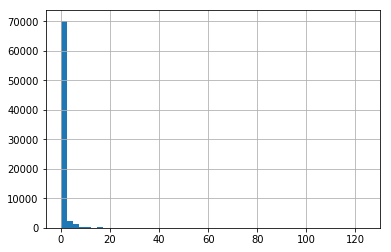

In [83]:
df[df.select_dtypes(include='int64').columns[19]].hist(bins=50)

In [84]:
#df=df2
df.select_dtypes(include='float64').columns

Index(['ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'Education_level', 'Length_residence',
       'Est_BMI_decile', 'Num_person_household', 'College', 'Online_purchaser',
       'Online_User', 'Pct_above_poverty_line', 'Pct_below_poverty_line',
       'Decile_struggle_Med_lang', 'Home_value', 'Est_Net_worth', 'Est_income',
       'Index_Health_ins_engage', 'Index_Health_ins_influence',
       'Population_density_centile_ST', 'Population_density_centile_US'],
      dtype='object')

In [85]:
df['ORIG_REAS_ENTITLE_CD']=df['ORIG_REAS_ENTITLE_CD'].astype('object')
df['Education_level']=df['Education_level'].astype('object')
df['Est_BMI_decile']=df['Est_BMI_decile'].astype('object')
df['College']=df['College'].astype('int64')
df['Online_purchaser']=df['Online_purchaser'].astype('int64')
df['Online_User']=df['Online_User'].astype('int64')
df['Decile_struggle_Med_lang']=df['Decile_struggle_Med_lang'].astype('object')
df['Index_Health_ins_engage']=df['Index_Health_ins_engage'].astype('object')
df['Index_Health_ins_influence']=df['Index_Health_ins_influence'].astype('object')

In [86]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#scaler.fit(X_test)
#X_test = scaler.transform(X_test)
#scaler = MinMaxScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_train=preprocessing.scale(X_train)
#X_test=preprocessing.scale(X_test)

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [87]:
for col in df.select_dtypes(include='int64').columns:
    if col in ['ID','AMI_FLAG']:
        continue
    else:
        min_value=np.min(df[col])
        max_value=np.max(df[col])
        df[col]=(df[col]-min_value)/(max_value-min_value)
    

In [88]:
for col in df.select_dtypes(include='float64').columns:
    min_value=np.min(df[col])
    max_value=np.max(df[col])
    df[col]=(df[col]-min_value)/(max_value-min_value)
    

In [89]:
df.get_dtype_counts()

float64    416
int64        2
object      15
dtype: int64

In [90]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(return_indices=True)
#X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [93]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_sample(X, y)


In [94]:
le=preprocessing.LabelEncoder()

In [95]:
df.select_dtypes(include='object').columns

Index(['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'ORIG_REAS_ENTITLE_CD',
       'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL', 'LIS', 'MCO_HLVL_PLAN_CD',
       'MCO_PROD_TYPE_CD', 'Education_level', 'Est_BMI_decile',
       'Decile_struggle_Med_lang', 'Index_Health_ins_engage',
       'Index_Health_ins_influence'],
      dtype='object')

In [96]:
df['SEX_CD']=le.fit_transform(df['SEX_CD'])

In [97]:
df['ESRD_IND']=le.fit_transform(df['ESRD_IND'])

In [98]:
df['HOSPICE_IND']=le.fit_transform(df['HOSPICE_IND'])

In [99]:
df['ORIG_REAS_ENTITLE_CD']=le.fit_transform(df['ORIG_REAS_ENTITLE_CD'])

In [100]:
df['PCP_ASSIGNMENT']=le.fit_transform(df['PCP_ASSIGNMENT'])

In [101]:
df['DUAL']=le.fit_transform(df['DUAL'])

In [102]:
df['INSTITUTIONAL']=le.fit_transform(df['INSTITUTIONAL'])

In [103]:
df['LIS']=le.fit_transform(df['LIS'])

In [104]:
df['MCO_HLVL_PLAN_CD']=le.fit_transform(df['MCO_HLVL_PLAN_CD'])

In [105]:
df['MCO_PROD_TYPE_CD']=le.fit_transform(df['MCO_PROD_TYPE_CD'])

In [106]:
df['Education_level']=le.fit_transform(df['Education_level'])

In [107]:
df['Est_BMI_decile']=le.fit_transform(df['Est_BMI_decile'])

In [108]:
df['Decile_struggle_Med_lang']=le.fit_transform(df['Decile_struggle_Med_lang'])

In [109]:
df['Index_Health_ins_engage']=le.fit_transform(df['Index_Health_ins_engage'])

In [110]:
df['Index_Health_ins_influence']=le.fit_transform(df['Index_Health_ins_influence'])

In [111]:
#df=pd.get_dummies(df)
t=list(df.columns)
tmp=df.columns[df.columns.get_loc('AMI_FLAG')]
t.append(tmp)
del t[df.columns.get_loc('AMI_FLAG')]
df=df[t]
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]
print(X.shape,y.shape)
X1,X_test,y1,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

(74670, 431) (74670,)


In [112]:
sm = SMOTE(random_state=12, ratio = 1.0)
X1, y1 = sm.fit_sample(X1, y1)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [113]:
X_train,X_val,y_train,y_val=train_test_split(X1,y1,test_size=0.1,random_state=42)

In [133]:
train_data=lgb.Dataset(X_train,label=y_train)

In [134]:
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [135]:
#training our model using light gbm
num_round=50
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()

In [136]:
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(0, 11, 170100)

In [137]:
ypred2=lgbm.predict(X_val)
 # showing first 5 predictions

array([0.94210279, 0.08717707, 0.95879224, 0.84569941, 0.94302463])

In [143]:
for i in range(0,len(ypred2)):
    if ypred2[i]<0.5:
        ypred2[i]=0
    else:
        ypred2[i]=1
        

array([1., 0., 1., ..., 0., 0., 0.])

In [145]:
confusion_matrix(y_val,ypred2)

array([[5948,   29],
       [ 187, 5464]], dtype=int64)

In [172]:
testpreds=lgbm.predict(X_test)

In [173]:
for i in range(0,len(testpreds)):
    if testpreds[i]<0.1:
        testpreds[i]=0
    else:
        testpreds[i]=1
        

In [174]:
print("Confusion Matrix: "+"\n",confusion_matrix(y_test,testpreds))

Confusion Matrix: 
 [[7349 7194]
 [  92  299]]


In [175]:
print("Precision Score on Test Data: ",precision_score(y_test,testpreds))
print("Recall Score on Test Data: ",recall_score(y_test,testpreds))

Precision Score on Test Data:  0.039903910316295206
Recall Score on Test Data:  0.7647058823529411
